# Import Libraries

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [2]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

# Image Preprocessing

In [3]:
import os
import cv2
import numpy as np

X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

train_dir = r'C:\brain-tumor-detection\Training'
test_dir = r'C:\brain-tumor-detection\Testing'

# Process training data
for label in labels:
    folderPath = os.path.join(train_dir, label)
    for filename in os.listdir(folderPath):
        img_path = os.path.join(folderPath, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (image_size, image_size))
            X_train.append(img)
            Y_train.append(label)

# Process testing data
for label in labels:
    folderPath = os.path.join(test_dir, label)
    for filename in os.listdir(folderPath):
        img_path = os.path.join(folderPath, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (image_size, image_size))
            X_train.append(img)
            Y_train.append(label)

# Convert lists to numpy arrays
X_train = np.array(X_train)
Y_train = np.array(Y_train)

# Print the shapes of the arrays
print(f'X_train shape: {X_train.shape}')
print(f'Y_train shape: {Y_train.shape}')


X_train shape: (3264, 150, 150, 3)
Y_train shape: (3264,)


# Train Test Split

In [4]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [6]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

# CNN

In [7]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [4]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

NameError: name 'model' is not defined

In [ ]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20


83/83 [==============================] - 458s 5s/step - loss: 1.6868 - accuracy: 0.3311 - val_loss: 1.1488 - val_accuracy: 0.4932
Epoch 2/20
83/83 [==============================] - 432s 5s/step - loss: 1.0522 - accuracy: 0.5426 - val_loss: 1.0046 - val_accuracy: 0.5680
Epoch 3/20
83/83 [==============================] - 438s 5s/step - loss: 0.8602 - accuracy: 0.6273 - val_loss: 0.7596 - val_accuracy: 0.6497
Epoch 4/20
83/83 [==============================] - 426s 5s/step - loss: 0.7448 - accuracy: 0.6841 - val_loss: 0.7503 - val_accuracy: 0.6293
Epoch 5/20
83/83 [==============================] - 418s 5s/step - loss: 0.6779 - accuracy: 0.7204 - val_loss: 0.7194 - val_accuracy: 0.6735
Epoch 6/20
83/83 [==============================] - 412s 5s/step - loss: 0.5762 - accuracy: 0.7707 - val_loss: 0.7210 - val_accuracy: 0.6905
Epoch 7/20
83/83 [==============================] - 414s 5s/step - loss: 0.5395 - accuracy: 0.7866 - val_loss: 0.6358 - val_accuracy: 0.7449
Epoch 8/20


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
import h5py
# Assuming you have trained your model and have a 'history' object
# Save the model
model.save('braintumor.h5')

# Extract accuracy and validation accuracy from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

# Plot the training and validation accuracy
fig = plt.figure(figsize=(14, 7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='upper left')
plt.show()


In [ ]:
# Extract loss and validation loss from the history object
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))

# Plot the training and validation loss
fig = plt.figure(figsize=(14, 7))
plt.plot(epochs, loss, 'r', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input

# Load and preprocess the image
img = cv2.imread(r"C:\brain-tumor-detection\Testing\no_tumor\image(18).jpg")
img = cv2.resize(img, (150, 150))
img_array = np.array(img)
img_array = img_array.reshape(1, 150, 150, 3)
preprocessed_img_array = preprocess_input(img_array)


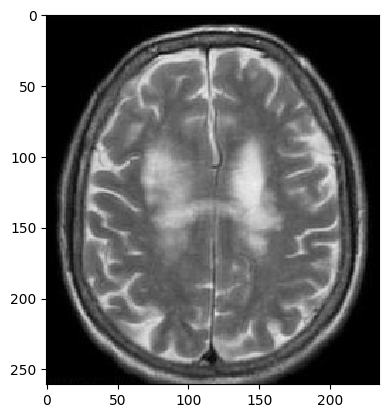

In [2]:

# Visualize the image
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

img = image.load_img(r"C:\brain-tumor-detection\Testing\no_tumor\image(18).jpg")
plt.imshow(img, interpolation='nearest')
plt.show()


In [ ]:

# Make predictions
predictions = model.predict(preprocessed_img_array)
predicted_class_index = np.argmax(predictions)
predicted_class = labels[predicted_class_index]


In [3]:
a=model.predict(img_array)
indices = a.argmax()
indices

NameError: name 'model' is not defined